In [1]:
# 蔡佳恩 609001063

# 1. Data Input

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import urllib3
%matplotlib inline

df=pd.read_csv('student-mat.csv')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [2]:
# 2. Data Processing

# 處理 Binary classification的targets

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
targets_bi=pd.DataFrame(columns=['pass or fail'],index=list(range(0,395)))
targets_bi

,pass or fail
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
390,NaN
391,NaN
392,NaN
393,NaN


In [4]:
for i in range(0,395):
    if df.iloc[i,32]>=10:
        targets_bi.iloc[i,0]='pass'
    else:
        targets_bi.iloc[i,0]='fail'
        
targets_bi   

,pass or fail
0,fail
1,fail
2,pass
3,pass
4,pass
...,...
390,fail
391,pass
392,fail
393,pass


In [5]:
# 處理 5-Level classification的targets

targets_5level=pd.DataFrame(columns=['level'],index=list(range(0,395)))
targets_5level

,level
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
390,NaN
391,NaN
392,NaN
393,NaN


In [6]:
for i in range(0,395):
    if 20>=df.iloc[i,32]>=16:
        targets_5level.iloc[i,0]='A'
    elif 15>=df.iloc[i,32]>=14:
        targets_5level.iloc[i,0]='B'
    elif 13>=df.iloc[i,32]>=12:
        targets_5level.iloc[i,0]='C'    
    elif 11>=df.iloc[i,32]>=10:
        targets_5level.iloc[i,0]='D'
    else:
        targets_5level.iloc[i,0]='F'
targets_5level   

,level
0,F
1,F
2,D
3,B
4,D
...,...
390,F
391,A
392,F
393,D


In [7]:
# 把binary classification和5-level classification 的targets加進df裡面

df=pd.concat([df,targets_bi], axis=1)
df=pd.concat([df,targets_5level], axis=1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,pass or fail,level
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,fail,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,fail,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,pass,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,pass,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,pass,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,fail,F
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,pass,A
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,fail,F
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,pass,D


In [8]:
# 檢查一下

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass or fail',
       'level'],
      dtype='object')

In [9]:
# 處理decicion tree和random forest 要用的資料（把categorical跟numerical features都變成label）

from sklearn.preprocessing import LabelEncoder

In [10]:
df_label=pd.DataFrame(columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass or fail',
       'level'],index=list(range(0,395)))
df_label

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,pass or fail,level
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
label=LabelEncoder()

In [12]:
for i in range(0,35):
    df_label.iloc[:,i]=label.fit_transform(df.iloc[:,i])
df_label    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,pass or fail,level
0,0,0,3,1,0,0,4,4,0,4,...,3,0,0,2,6,2,3,3,0,4
1,0,0,2,1,0,1,1,1,0,2,...,2,0,0,2,4,2,2,3,0,4
2,0,0,0,1,1,1,1,1,0,2,...,1,1,2,2,10,4,5,7,1,3
3,0,0,0,1,0,1,4,2,1,3,...,1,0,0,4,2,12,11,12,1,1
4,0,0,1,1,0,1,3,3,2,2,...,1,0,1,4,4,3,7,7,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,5,1,1,0,2,2,3,3,...,3,3,4,3,11,6,6,6,0,4
391,1,1,2,1,1,1,3,1,3,3,...,4,2,3,1,3,11,13,13,1,0
392,1,1,6,0,0,1,1,1,2,2,...,2,2,2,2,3,7,5,4,0,4
393,1,1,3,0,1,1,3,2,3,2,...,0,2,3,4,0,8,9,7,1,3


In [13]:
# 處理knn要用到的資料（不能用全都用label，因為對某些feature-例如工作種類-來說，label的數字大小沒有意義，不能直接用knn下去算距離。）

dummies = pd.get_dummies(df) 
dummies

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,internet_yes,romantic_no,romantic_yes,pass or fail_fail,pass or fail_pass,level_A,level_B,level_C,level_D,level_F
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,0,0,0,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,1,1,0,1,0,0,0,0,0,1
2,15,1,1,1,2,3,4,3,2,2,...,1,1,0,0,1,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,1,0,1,0,1,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,2,4,5,3,...,1,1,0,0,1,1,0,0,0,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,4,4,1,3,...,1,1,0,0,1,0,0,0,1,0


In [14]:
dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'pass or fail_fail', 'pass or fail_pass', 'level_A',
       'level_B', 'level_C', 'level_D', 'level_F'],
      dtype=

In [15]:
# 第9.10.11.12項feature是nominal的，而且這四個features都有2個以上的選項，不能直接給label算距離，所以把他們的dummies抓出來。

dummies_for_knn=dummies[['Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']]
dummies_for_knn

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [16]:
df_for_knn=df_label.drop(['Mjob','Fjob','reason','guardian'],axis=1) 
df_for_knn=pd.concat([df_for_knn,dummies_for_knn],axis=1)
df_for_knn

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,3,1,0,0,4,4,1,1,...,0,0,1,1,0,0,0,0,1,0
1,0,0,2,1,0,1,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2,0,0,0,1,1,1,1,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,1,4,2,0,2,...,0,1,0,0,1,0,0,0,1,0
4,0,0,1,1,0,1,3,3,0,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,5,1,1,0,2,2,0,1,...,0,1,0,1,0,0,0,0,0,1
391,1,1,2,1,1,1,3,1,1,0,...,0,1,0,1,0,0,0,0,1,0
392,1,1,6,0,0,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
393,1,1,3,0,1,1,3,2,2,0,...,1,0,0,1,0,0,0,0,1,0


In [17]:
# shuffle 資料

from sklearn.utils import shuffle
df_label=shuffle(df_label)
df_for_knn=shuffle(df_for_knn)
df_label

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,pass or fail,level
273,0,1,2,0,0,1,1,2,0,0,...,1,1,1,0,2,12,11,11,1,1
109,0,0,1,1,1,1,4,4,1,1,...,4,0,0,3,4,11,12,13,1,0
103,0,0,0,1,0,1,3,2,3,2,...,4,0,0,1,26,4,3,3,0,4
165,0,1,1,1,0,1,3,2,3,3,...,1,0,0,1,16,9,8,9,1,2
300,0,0,3,1,1,0,4,4,1,2,...,3,0,0,3,14,9,7,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,3,1,0,1,4,3,2,2,...,2,0,0,2,0,11,10,11,1,1
250,0,1,3,1,0,1,3,2,3,2,...,4,1,3,4,0,3,5,5,0,4
200,0,0,1,1,0,1,4,3,1,2,...,4,0,4,1,2,13,13,13,1,0
279,0,1,3,1,1,1,4,3,4,3,...,2,0,1,0,8,7,8,7,1,3


In [18]:
df_for_knn

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
291,0,0,2,1,0,1,4,3,0,2,...,0,1,0,0,0,0,1,0,1,0
122,0,0,1,1,1,1,2,4,1,1,...,0,0,0,1,0,0,0,1,0,0
131,0,0,0,1,0,1,1,1,2,0,...,1,0,0,1,0,0,0,0,1,0
285,0,1,2,1,0,1,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
102,0,1,0,1,0,1,4,4,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,0,2,0,0,0,3,2,0,1,...,1,0,0,0,1,0,0,0,1,0
43,0,1,0,1,0,1,2,2,0,0,...,0,1,0,1,0,0,0,1,0,0
272,0,0,3,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
213,0,1,3,1,0,1,2,2,0,1,...,1,0,0,0,1,0,0,0,1,0


In [19]:
# 取出decisiont tree和random forest要用的的inputs

inputs_for_tree=df_label.drop(['G3','pass or fail','level'],axis=1)
inputs_for_tree

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
273,0,1,2,0,0,1,1,2,0,0,...,1,2,4,1,1,1,0,2,12,11
109,0,0,1,1,1,1,4,4,1,1,...,1,4,3,4,0,0,3,4,11,12
103,0,0,0,1,0,1,3,2,3,2,...,0,3,2,4,0,0,1,26,4,3
165,0,1,1,1,0,1,3,2,3,3,...,0,3,4,1,0,0,1,16,9,8
300,0,0,3,1,1,0,4,4,1,2,...,1,3,1,3,0,0,3,14,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,3,1,0,1,4,3,2,2,...,0,3,2,2,0,0,2,0,11,10
250,0,1,3,1,0,1,3,2,3,2,...,0,3,3,4,1,3,4,0,3,5
200,0,0,1,1,0,1,4,3,1,2,...,0,3,2,4,0,4,1,2,13,13
279,0,1,3,1,1,1,4,3,4,3,...,0,3,1,2,0,1,0,8,7,8


In [20]:
# 取出decision tree和random forest 的 binary classification 的 targets
# 取出decision tree和random forest的 5-level classification 的targets

targets_for_tree_bi=df_label[['pass or fail']]
targets_for_tree_5level=df_label[['level']]

In [21]:
# 取出knn的inputs

inputs_for_knn=df_for_knn.drop(['G3','pass or fail','level'],axis=1)
inputs_for_knn

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
291,0,0,2,1,0,1,4,3,0,2,...,0,1,0,0,0,0,1,0,1,0
122,0,0,1,1,1,1,2,4,1,1,...,0,0,0,1,0,0,0,1,0,0
131,0,0,0,1,0,1,1,1,2,0,...,1,0,0,1,0,0,0,0,1,0
285,0,1,2,1,0,1,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
102,0,1,0,1,0,1,4,4,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,0,2,0,0,0,3,2,0,1,...,1,0,0,0,1,0,0,0,1,0
43,0,1,0,1,0,1,2,2,0,0,...,0,1,0,1,0,0,0,1,0,0
272,0,0,3,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
213,0,1,3,1,0,1,2,2,0,1,...,1,0,0,0,1,0,0,0,1,0


In [22]:
# 取出 knn 的binary classification 的 targets
# 取出 knn 的5-level classification 的 targets

targets_for_knn_bi=df_for_knn[['pass or fail']]
targets_for_knn_5level=df_for_knn[['level']]

In [23]:
# 3. Model Construction
from sklearn import tree
decision_tree_model=tree.DecisionTreeClassifier(criterion='entropy')

from sklearn.ensemble import RandomForestClassifier
random_forest_model_1=RandomForestClassifier(n_estimators=5)
random_forest_model_2=RandomForestClassifier(n_estimators=10)
random_forest_model_3=RandomForestClassifier(n_estimators=50)

from sklearn.neighbors import KNeighborsClassifier
knn_model_1=KNeighborsClassifier(n_neighbors=3,weights='uniform',p=2)
knn_model_2=KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2)
knn_model_3=KNeighborsClassifier(n_neighbors=10,weights='uniform',p=2)

In [24]:
# 4. Validation
# Holdout validation
from sklearn.model_selection import train_test_split

X_train_tree_bi,X_test_tree_bi,y_train_tree_bi,y_test_tree_bi=train_test_split(inputs_for_tree,targets_for_tree_bi,test_size=0.3)
X_train_tree_5level,X_test_tree_5level,y_train_tree_5level,y_test_tree_5level=train_test_split(inputs_for_tree,targets_for_tree_5level,test_size=0.3)

X_train_knn_bi,X_test_knn_bi,y_train_knn_bi,y_test_knn_bi=train_test_split(inputs_for_knn,targets_for_knn_bi,test_size=0.3)
X_train_knn_5level,X_test_knn_5level,y_train_knn_5level,y_test_knn_5level=train_test_split(inputs_for_knn,targets_for_knn_5level,test_size=0.3)

In [25]:
# decision tree的成績：a為binary classification, b為5 level classifacation
decision_tree_model.fit(X_train_tree_bi,y_train_tree_bi)
a=decision_tree_model.score(X_test_tree_bi,y_test_tree_bi)

decision_tree_model.fit(X_train_tree_5level,y_train_tree_5level)
b=decision_tree_model.score(X_test_tree_5level,y_test_tree_5level)

print(a,b)

0.8823529411764706 0.6386554621848739


In [26]:
# random foerest的成績： c,d,e為三種不同樹的數量的隨機森林模型跑出的binary classification的成績； f,g,h為三種不同樹的數量的隨機森林模型跑出的 5 level classifacation的成績

random_forest_model_1.fit(X_train_tree_bi,y_train_tree_bi)
c=random_forest_model_1.score(X_test_tree_bi,y_test_tree_bi)

random_forest_model_2.fit(X_train_tree_bi,y_train_tree_bi)
d=random_forest_model_2.score(X_test_tree_bi,y_test_tree_bi)

random_forest_model_3.fit(X_train_tree_bi,y_train_tree_bi)
e=random_forest_model_3.score(X_test_tree_bi,y_test_tree_bi)

random_forest_model_1.fit(X_train_tree_5level,y_train_tree_5level)
f=random_forest_model_1.score(X_test_tree_5level,y_test_tree_5level)

random_forest_model_2.fit(X_train_tree_5level,y_train_tree_5level)
g=random_forest_model_2.score(X_test_tree_5level,y_test_tree_5level)

random_forest_model_3.fit(X_train_tree_5level,y_train_tree_5level)
h=random_forest_model_3.score(X_test_tree_5level,y_test_tree_5level)

print(c,d,e,f,g,h)

0.8991596638655462 0.9243697478991597 0.9411764705882353 0.5126050420168067 0.5546218487394958 0.6386554621848739


<ipython-input-26-11d38f95ee84>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_1.fit(X_train_tree_bi,y_train_tree_bi)
<ipython-input-26-11d38f95ee84>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_2.fit(X_train_tree_bi,y_train_tree_bi)
<ipython-input-26-11d38f95ee84>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_3.fit(X_train_tree_bi,y_train_tree_bi)
<ipython-input-26-11d38f95ee84>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_1.fit(X_train_tree_5level,y_train_

In [27]:
# knn的成績： i,j,k為三種不同K值的knn模型跑出的binary classification的成績；l,m,n為三種不同K值的knn模型跑出的 5 level classifacation的成績
knn_model_1.fit(X_train_knn_bi,y_train_knn_bi)
i=knn_model_1.score(X_test_knn_bi,y_test_knn_bi)

knn_model_2.fit(X_train_knn_bi,y_train_knn_bi)
j=knn_model_2.score(X_test_knn_bi,y_test_knn_bi)

knn_model_3.fit(X_train_knn_bi,y_train_knn_bi)
k=knn_model_3.score(X_test_knn_bi,y_test_knn_bi)

knn_model_1.fit(X_train_knn_5level,y_train_knn_5level)
l=knn_model_1.score(X_test_knn_5level,y_test_knn_5level)

knn_model_2.fit(X_train_knn_5level,y_train_knn_5level)
m=knn_model_2.score(X_test_knn_5level,y_test_knn_5level)

knn_model_3.fit(X_train_knn_5level,y_train_knn_5level)
n=knn_model_3.score(X_test_knn_5level,y_test_knn_5level)

print(i,j,k,l,m,n)

<ipython-input-27-0a672360f248>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_1.fit(X_train_knn_bi,y_train_knn_bi)


0.8487394957983193 0.8571428571428571 0.8739495798319328 0.6554621848739496 0.6890756302521008 0.6722689075630253


<ipython-input-27-0a672360f248>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_2.fit(X_train_knn_bi,y_train_knn_bi)
<ipython-input-27-0a672360f248>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_3.fit(X_train_knn_bi,y_train_knn_bi)
<ipython-input-27-0a672360f248>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_1.fit(X_train_knn_5level,y_train_knn_5level)
<ipython-input-27-0a672360f248>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_2.fit(X_train_knn_5level,y_train_knn_5level)
<ipython-input-27-0a67

In [28]:
# K-fold cross-validation

# 以decision tree, binary classification 為例
from sklearn.model_selection import KFold
import numpy as np
kf=KFold(n_splits=3,shuffle=False)

score=0

for train_index,test_index in kf.split(df_label):
    X_train,X_test = inputs_for_tree.iloc[train_index,:], inputs_for_tree.iloc[test_index,:]
    y_train,y_test = targets_for_tree_bi.iloc[train_index,:], targets_for_tree_bi.iloc[test_index,:]
    decision_tree_model.fit(X_train,y_train)
    score=score+decision_tree_model.score(X_test,y_test)

print('The average score of the model:',score/3)

The average score of the model: 0.8710000771069474


In [29]:
# knn(第三種knn模型), 5-level classification 為例
from sklearn.model_selection import KFold
import numpy as np
kf=KFold(n_splits=3,shuffle=False)

score=0

for train_index,test_index in kf.split(df_for_knn):
    X_train,X_test = inputs_for_knn.iloc[train_index,:], inputs_for_knn.iloc[test_index,:]
    y_train,y_test = targets_for_knn_5level.iloc[train_index,:], targets_for_knn_5level.iloc[test_index,:]
    knn_model_3.fit(X_train,y_train)
    score=score+knn_model_3.score(X_test,y_test)

print('The average score:',score/3)

# 其他模型的驗證方法類似就不再贅述

The average score: 0.645577916570283


<ipython-input-29-9cd29641cdad>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_3.fit(X_train,y_train)
<ipython-input-29-9cd29641cdad>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_3.fit(X_train,y_train)
<ipython-input-29-9cd29641cdad>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_3.fit(X_train,y_train)


In [30]:
# 5. Results
# 以decision tree, binary classification 為例, 0為fail，1為pass

from sklearn.model_selection import KFold
import numpy as np
kf=KFold(n_splits=3,shuffle=False)

for train_index,test_index in kf.split(df_label):
    X_train,X_test = inputs_for_tree.iloc[train_index,:], inputs_for_tree.iloc[test_index,:]
    y_train,y_test = targets_for_tree_bi.iloc[train_index,:], targets_for_tree_bi.iloc[test_index,:]
    decision_tree_model.fit(X_train,y_train)
   
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = decision_tree_model.predict(X_test)
con_matrix=pd.DataFrame(confusion_matrix(y_true,y_pred))
con_matrix

,0,1
0,33,7
1,7,84


In [31]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn, fp, fn, tp)

33 7 7 84


In [32]:
# 套入公式求出accuracy，precision和sensitivity（recall）

accuracy= (tp+tn)/(tp+fp+fn+tn)
precision= tp/(tp+fp)
recal=tp/(tp+fn)
print(accuracy)
print(precision)
print(recal)

# 其他模型的驗證方法類似就不再贅述

0.8931297709923665
0.9230769230769231
0.9230769230769231


In [33]:
# 6. Comparison & Conclusion

# 以我做的結果來說，binary classification的結果都較為準確，5 level的預測準確度較低。可能因為只分兩類，只有一條邊界，只有那條界線附近
# 的資料容易出錯。5 level的資料就分類就有超多條邊界了，所以更容易錯。
#
# 助教改作業辛苦了
#回答我們的問題也辛苦了，謝謝

In [34]:
# 7. Question

# Question-1 Decision Tree:以編號第233筆資料為例
X_train_tree_bi,X_test_tree_bi,y_train_tree_bi,y_test_tree_bi=train_test_split(inputs_for_tree,targets_for_tree_bi,test_size=0.3)
decision_tree_model.fit(X_train_tree_bi,y_train_tree_bi)
X_test_tree_bi

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
32,0,1,0,0,0,1,4,3,4,0,...,1,3,4,1,0,0,4,0,14,13
317,0,0,3,1,0,1,4,3,2,2,...,1,3,2,3,0,0,4,9,6,7
42,0,1,0,1,0,1,4,4,3,4,...,0,3,2,2,0,0,4,2,16,15
170,0,1,1,1,0,1,3,4,2,2,...,0,2,3,4,1,3,1,0,3,2
308,0,1,4,0,0,1,3,3,2,3,...,1,3,4,2,0,1,4,0,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,1,2,1,1,1,4,3,4,2,...,0,3,3,3,3,3,3,4,7,6
64,0,0,0,1,1,1,4,3,3,3,...,1,3,3,3,1,3,1,0,7,7
54,0,0,0,1,1,0,3,3,2,2,...,0,4,2,3,3,3,0,6,7,10
352,1,1,3,1,1,1,1,3,0,3,...,1,3,2,2,1,2,2,7,5,4


In [35]:
# 模型預測出來的結果為pass
decision_tree_model.predict(X_test_tree_bi.iloc[[0],:])

array([1])

[Text(177.24705882352941, 208.38, 'X[31] <= 6.5\nentropy = 0.903\nsamples = 276\nvalue = [88, 188]'),
 Text(98.47058823529412, 190.26, 'X[31] <= 4.5\nentropy = 0.676\nsamples = 101\nvalue = [83, 18]'),
 Text(78.7764705882353, 172.14, 'entropy = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(118.16470588235295, 172.14, 'X[29] <= 10.5\nentropy = 0.912\nsamples = 55\nvalue = [37, 18]'),
 Text(98.47058823529412, 154.01999999999998, 'X[24] <= 3.5\nentropy = 0.976\nsamples = 44\nvalue = [26, 18]'),
 Text(78.7764705882353, 135.89999999999998, 'X[29] <= 1.0\nentropy = 0.934\nsamples = 40\nvalue = [26, 14]'),
 Text(39.38823529411765, 117.77999999999999, 'X[28] <= 0.5\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(19.694117647058825, 99.66, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(59.082352941176474, 99.66, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(118.16470588235295, 117.77999999999999, 'X[8] <= 0.5\nentropy = 0.996\nsamples = 28\nvalue = [15, 13]'),
 Text(98.470

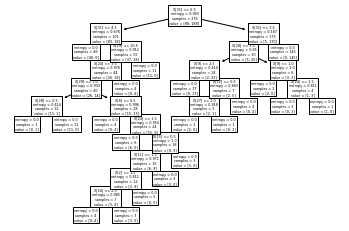

In [36]:
# 輸出樹狀圖
tree.plot_tree(decision_tree_model)

In [37]:
# Question-2 Random Forest
# boosting 跟 bagging都是通過合併多個模型來提升機器學習效能的方法。他們的差異是
#
# bagging: 從原始樣本集中抽取訓練集。每輪從原始樣本集中用"有放回"的方法抽取n個訓練樣本。共進行k輪抽取，得到k個訓練集。
#          對分類問題：將得到的k個模型採用投票的方式得到分類結果；對迴歸問題，計算上述模型的均值作為最後的結果。
#          每次訓練集可以取全部的特徵進行訓練，也可以隨機選取部分特徵訓練。
#
# boosting: 透過將舊分類器的錯誤資料權重提高，然後再訓練新的分類器，使得先前基學習器做錯的訓練樣本在後續受到更多關注，這樣新的分類器就會學習到錯誤分類資料的特性，進而提升分類結果。

In [38]:
# Question-3 knn
#
# 選擇'studytime'跟'famsup'這兩個features，把'level'當作target，再用knn重新訓練一次。

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X=df_label[['studytime','health']]
y=df_label['pass or fail']

In [40]:
# 建立模型並訓練模型
from sklearn.neighbors import KNeighborsClassifier
knn_model_3=KNeighborsClassifier(n_neighbors=10,weights='uniform',p=2)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

knn_model_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

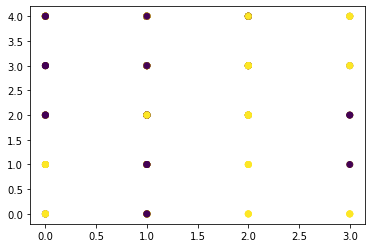

In [41]:
#訓練集作圖

plt.scatter(X_train['studytime'], X_train['health'], marker='o', c=y_train) 
plt.show()

In [42]:
# 測試集放進模型預測的結果
Z = knn_model_3.predict(X_test)

In [43]:
h = 0.02   # 網格圖裡的單位長
x_min, x_max = X_test['studytime'].min() - 1, X['studytime'].max() + 1
y_min, y_max = X_test['health'].min() - 1, X['health'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) 
Z = knn_model_3.predict(np.c_[xx.ravel(), yy.ravel()])

<ipython-input-44-a7685bb6b569>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


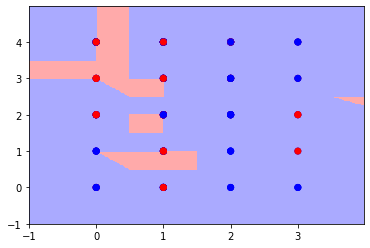

In [44]:
# 畫color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) 
cmap_bold = ListedColormap(['#FF0000', '#003300', '#0000FF'])
#把預測的結果在平面座標上畫出
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# 畫出訓練集
plt.scatter(X_train['studytime'], X_train['health'], c=[y_train], cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [45]:
# Show the prediction and reasoning of 1-samples in the validation set
# 把測試集裡的第一筆資料丟進模型。
X_test

,studytime,health
357,1,4
115,1,4
58,1,4
278,1,3
30,1,4
...,...,...
35,0,4
66,3,2
224,2,4
170,0,1


In [46]:
y_test

357    1
115    1
58     0
278    0
30     1
      ..
35     0
66     1
224    1
170    0
122    1
Name: pass or fail, Length: 119, dtype: int64

In [47]:
# 得到的預測結果為1，也就是pass。表示這筆資料最鄰近的10個樣本投票結果為pass。
knn_model_3.predict(X_test.iloc[[0],:])

array([1])